In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telangana-post-monsoon-ground-water-quality-data/ground_water_quality_2018_post.csv
/kaggle/input/telangana-post-monsoon-ground-water-quality-data/ground_water_quality_2019_post.csv
/kaggle/input/telangana-post-monsoon-ground-water-quality-data/ground_water_quality_2020_post.csv


Lets load libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv("/kaggle/input/telangana-post-monsoon-ground-water-quality-data/ground_water_quality_2020_post.csv")

In [4]:
df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,7.10,Post-monsoon 2020,NaN,8.01,...,33.00,171.0,9.0,24.0,72.930,359.876645,3.919146,C3S1,0.602467,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.35,Post-monsoon 2020,NaN,7.77,...,13.50,70.0,3.0,16.0,53.482,259.909539,1.887814,C3S1,-0.198191,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,5.05,Post-monsoon 2020,NaN,8.21,...,10.50,65.0,3.0,16.0,48.620,239.917763,1.824544,C2S1,0.001645,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,2.10,Post-monsoon 2020,NaN,8.3,...,7.25,31.0,1.0,16.0,29.172,159.950658,1.065714,C2S1,-0.199013,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,1.38,Post-monsoon 2020,NaN,7.67,...,14.50,129.0,2.0,32.0,5.000,82.878289,6.160862,C2S1,3.742434,U.S.


In [5]:
df.shape

(368, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               368 non-null    int64  
 1   district          368 non-null    object 
 2   mandal            368 non-null    object 
 3   village           368 non-null    object 
 4   lat_gis           368 non-null    float64
 5   long_gis          368 non-null    float64
 6   gwl               365 non-null    float64
 7   season            368 non-null    object 
 8   Unnamed: 8        0 non-null      float64
 9   pH                368 non-null    object 
 10  E.C               368 non-null    int64  
 11  TDS               368 non-null    float64
 12  CO3               368 non-null    float64
 13  HCO3              368 non-null    int64  
 14  Cl                368 non-null    int64  
 15  F                 368 non-null    float64
 16  NO3               368 non-null    float64
 1

There are 0 non-null values. No missing data.

Lets clean up the "ph" column and convert it to float

In [7]:
df.loc[261,'pH'] = df.loc[261,'pH'].replace('8..05', '8.05')

ph_numeric = pd.to_numeric(df['pH'])

df['pH'] = ph_numeric

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               368 non-null    int64  
 1   district          368 non-null    object 
 2   mandal            368 non-null    object 
 3   village           368 non-null    object 
 4   lat_gis           368 non-null    float64
 5   long_gis          368 non-null    float64
 6   gwl               365 non-null    float64
 7   season            368 non-null    object 
 8   Unnamed: 8        0 non-null      float64
 9   pH                368 non-null    float64
 10  E.C               368 non-null    int64  
 11  TDS               368 non-null    float64
 12  CO3               368 non-null    float64
 13  HCO3              368 non-null    int64  
 14  Cl                368 non-null    int64  
 15  F                 368 non-null    float64
 16  NO3               368 non-null    float64
 1

ph has been converted to float

Lets plot ph across the sites. These are ordered by sno. 

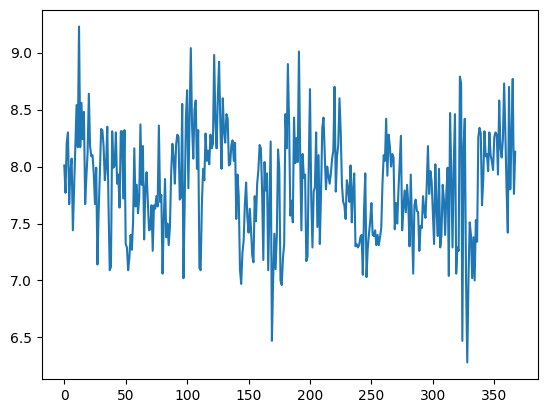

In [9]:
plt.plot(df['pH']) # 

Lets see if districts have a trend in ph.

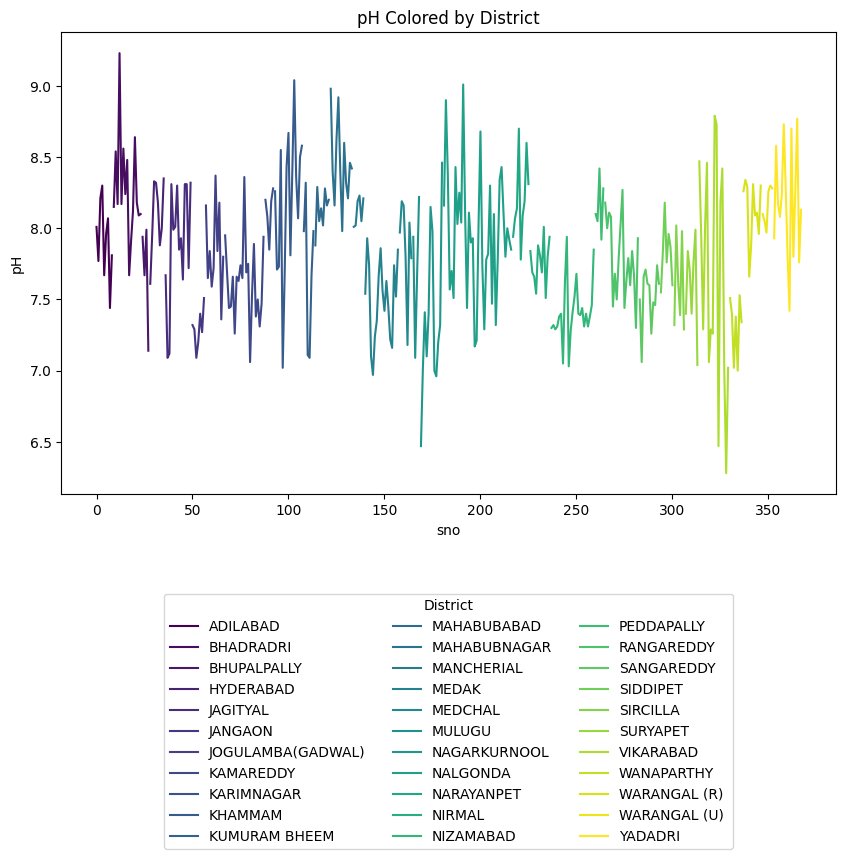

In [10]:
# Group by the categorical variable
groups = df.groupby('district')

# Define a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each group with a different color
for (name, group), color in zip(groups, colors):
    plt.plot(group['pH'], label=name, color=color)

# Add labels and title
plt.ylabel('pH')
plt.xlabel('sno')
plt.title('pH Colored by District')
plt.legend(title='District', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.show()



Hard to tell from this plot.

## What is the overall distribution of key water quality parameters (e.g., pH, TDS, Hardness, Chloride, etc.)

In [11]:
df.columns

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'Unnamed: 8', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F',
       'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification',
       'RSC  meq  / L', 'Classification.1'],
      dtype='object')

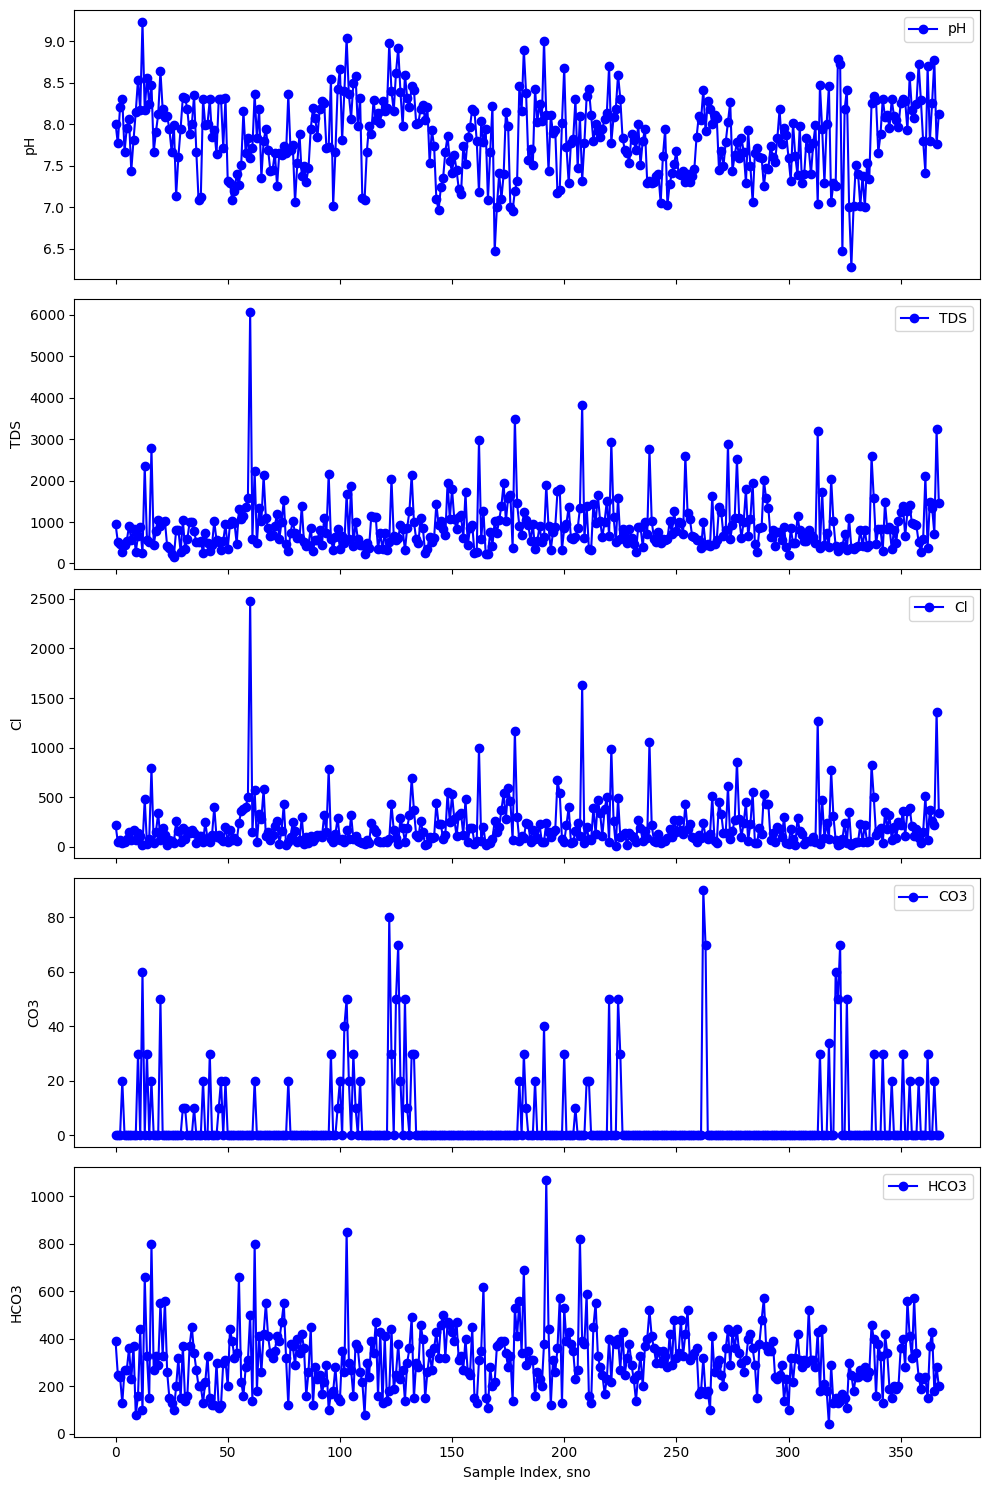

In [12]:
key_params = df[['pH','TDS','Cl','CO3','HCO3']]

# Number of params
num_params=key_params.shape[1] # get the number of columns of df

# Create subplots
fig, axes = plt.subplots(nrows=num_params, ncols=1, figsize=(10, num_params*3), sharex = True)

# Plot each group with a different color
for i, param in enumerate(key_params.columns):
    axes[i].plot(df[param], label=param, color='b', marker='o')
    axes[i].set_ylabel(param)
    axes[i].legend()
    
# Add a shared x-label
plt.xlabel('Sample Index, sno')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Which water quality parameter shows the most significant variation across different locations?


In [13]:
df.columns

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'Unnamed: 8', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F',
       'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification',
       'RSC  meq  / L', 'Classification.1'],
      dtype='object')

To compare the variability of parameters on different scales, you can use the coefficient of variation (CV), which normalizes the standard deviation by dividing it by the mean of the data. The coefficient of variation is a unitless measure and allows for comparison across different scales.

In [14]:
# Here are the params to compare
key_params = df[['pH','E.C','TDS','CO3','HCO3','Cl','F','NO3 ','SO4','Na','K','Ca','Mg','T.H','SAR']]

# Calculate the mean for each parameter
means = key_params.mean()

# Calculate the standard deviation for each parameter
std_devs = key_params.std()

# Calculate the coefficient of variation for each parameter
coeff_var = std_devs / means

# Find the parameter with the maximum coefficient of variation
most_variable_param_cv = coeff_var.idxmax()
most_variable_value_cv = coeff_var.max()

print(f"The parameter with the most significant variation (by coefficient of variation) is {most_variable_param_cv} with a value of {most_variable_value_cv}")


The parameter with the most significant variation (by coefficient of variation) is K with a value of 2.950560685166539


In [15]:
# Calculate the standard deviation for each parameter
means = key_params.mean()

means


pH         7.840815
E.C     1414.698370
TDS      905.406957
CO3        5.337049
HCO3     310.896739
Cl       205.625000
F          1.017927
NO3       80.519942
SO4       28.328668
Na       124.272500
K          7.351766
Ca        89.611957
Mg        51.553804
T.H      435.908512
SAR        2.713371
dtype: float64

## What percentage of the water samples meet the drinking water standards for key parameters like pH, TDS, and Hardness?


In [16]:
key_params = df[['pH','TDS','T.H']]

# Count of samples where ph is acceptable limits of 6.5 to 8
ph_count=len(key_params[(key_params['pH'] >= 6.5) & (key_params['pH'] <= 8.0)])
print(f"Count of samples where ph is acceptable limits of 6.5 to 8 {ph_count}")

# The Upper Limit of TDS level in drinking water set by Bureau of Indian Standards (BIS) is 500 ppm (500 milligrams per liter).
# Count of samples where TDS <= 500 mg/L and > 50 mg/L
tds_count = len(key_params[(key_params['TDS'] >= 50) & (key_params['TDS'] <= 500)])
print(f"Count of samples where TDS is acceptable limits of 50 and 500 ml/L {tds_count}")


Count of samples where ph is acceptable limits of 6.5 to 8 224
Count of samples where TDS is acceptable limits of 50 and 500 ml/L 92


## Are there any locations where the water quality parameters consistently exceed safe drinking levels?

Let us again take 'pH', 'TDS' and 'T.H' as our water quality parameters. Lets examine if there are sites where these 3 parameters consistently exceed safe levels. 

In [17]:
df[((df['pH'] >= 6.5) & (df['pH'] <= 8.0)) &  ((df['TDS'] >= 50) & (df['TDS'] <= 500)) & (df['T.H'] > 600)]

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1


There do not appear to be sites all 3 water quality parameters exceed safe levels.

## Are there any significant correlations between different water quality parameters? For instance, is there a strong relationship between TDS and Hardness?

In [18]:
key_params.corr()

,pH,TDS,T.H
pH,1.000000,-0.142907,-0.278149
TDS,-0.142907,1.000000,0.880114
T.H,-0.278149,0.880114,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


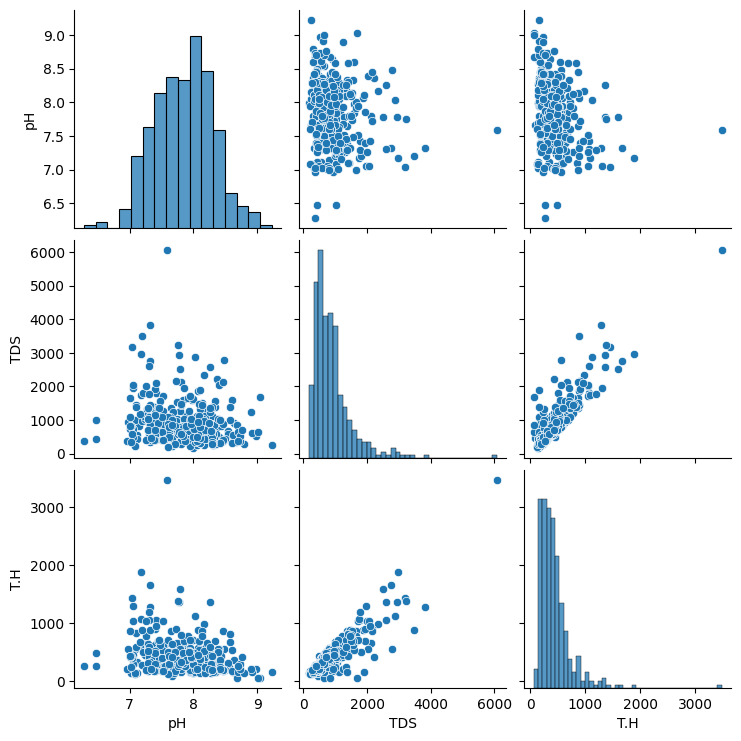

In [19]:
sns.pairplot(key_params)
plt.show()

## How do parameters vary across districts?

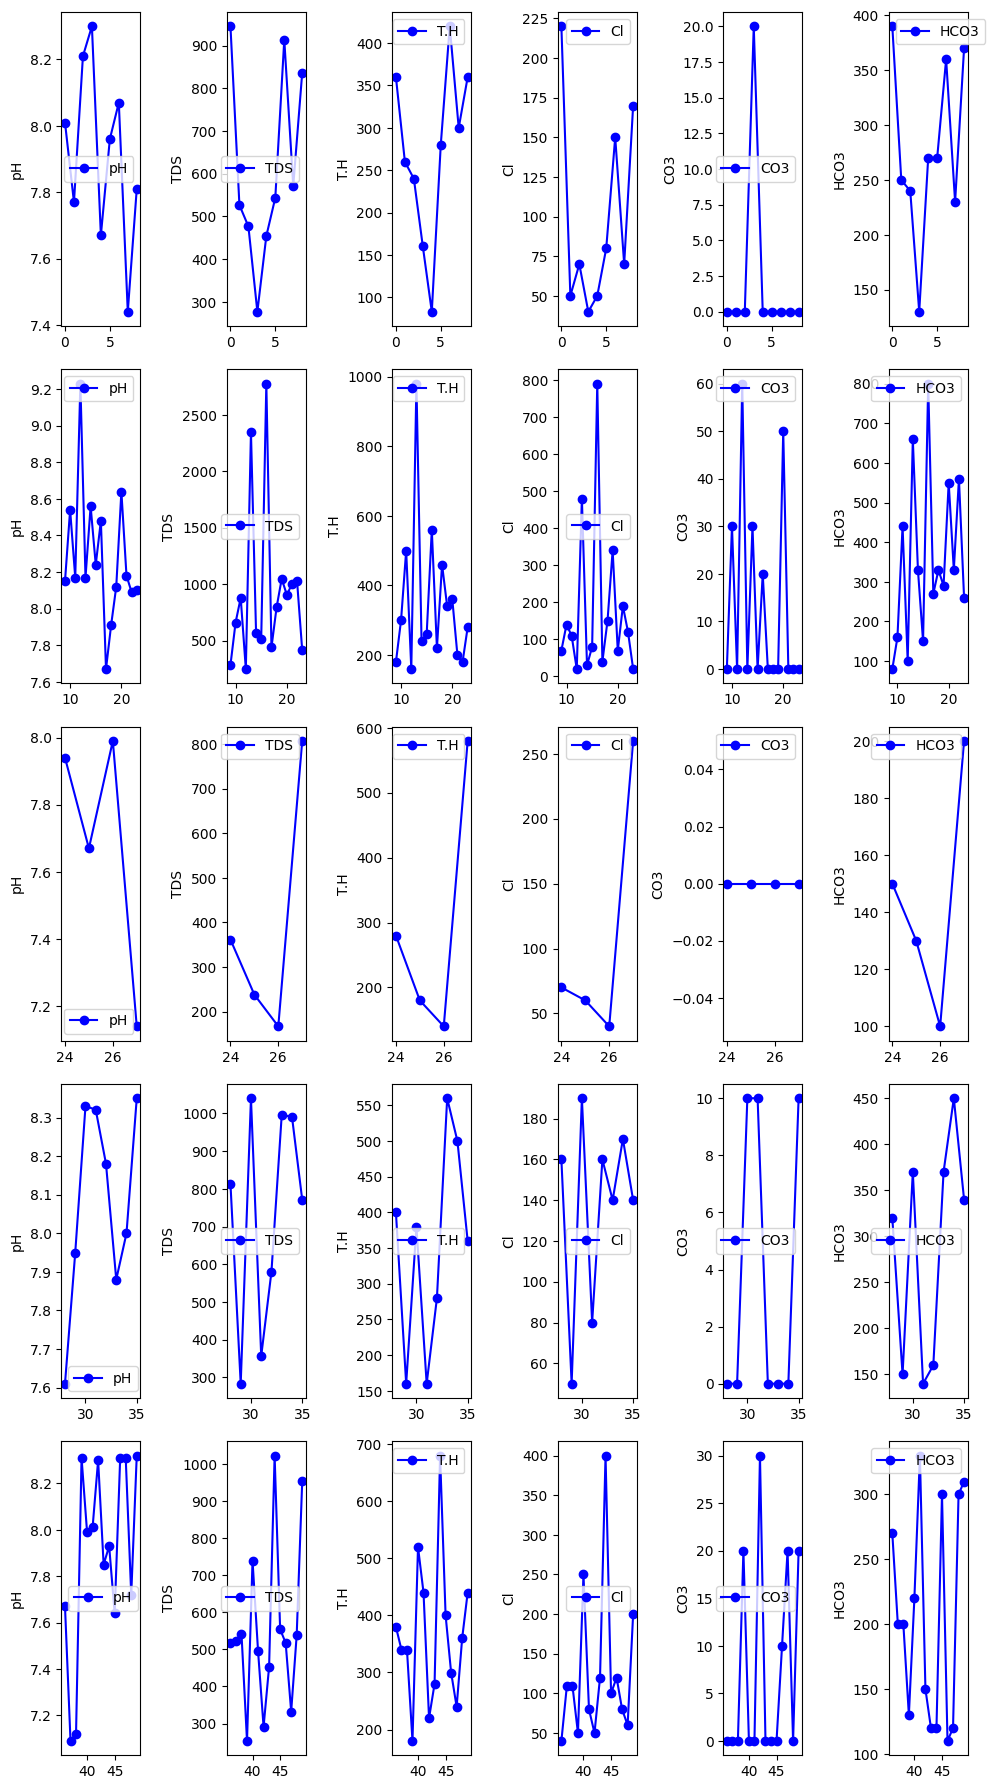

In [44]:
params_df = df[['district', 'pH', 'TDS', 'T.H', 'Cl','CO3','HCO3']]


# Get params and districts
ncols = (params_df.shape[1] - 1) # get the number of columns for plot
districts = list(df['district'].unique())[:5]

# Create subplots
fig, axes = plt.subplots(nrows=len(districts), ncols = ncols, figsize=(10, ncols*3))

# Plot each group with a different color

for j, district in enumerate(districts):
    for i, param in enumerate(params_df.columns[1:]):
        axes[j, i].plot(params_df[params_df['district']==district][param], label=param, color='b', marker='o')
        axes[j, i].set_ylabel(param)
        axes[j, i].legend()
    
# # # Add a shared x-label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

